### Import Libraries

In [5]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt

### 0. Metadata

In [18]:
imagename = "3.jpg"

# read the image data using PIL
image = Image.open(imagename)
info_dict = {
    "Filename": image.filename,
    "Image Size": image.size,
    "Image Height": image.height,
    "Image Width": image.width,
    "Image Format": image.format,
    "Image Mode": image.mode,
    "Image is Animated": getattr(image, "is_animated", False),
    "Frames in Image": getattr(image, "n_frames", 1)
}

for label,value in info_dict.items():
    print(f"{label:25}: {value}")

Filename                 : 3.jpg
Image Size               : (698, 708)
Image Height             : 708
Image Width              : 698
Image Format             : JPEG
Image Mode               : RGB
Image is Animated        : False
Frames in Image          : 1


### 1. load cv image and display

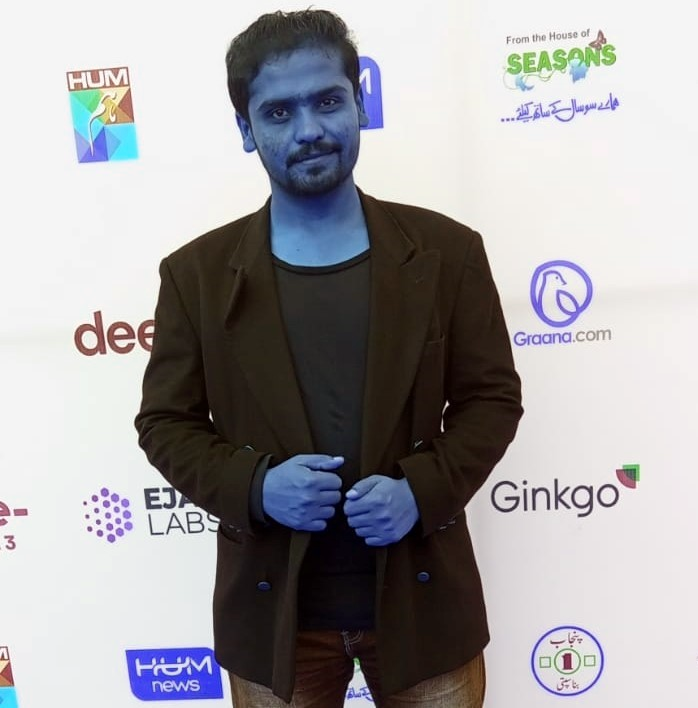

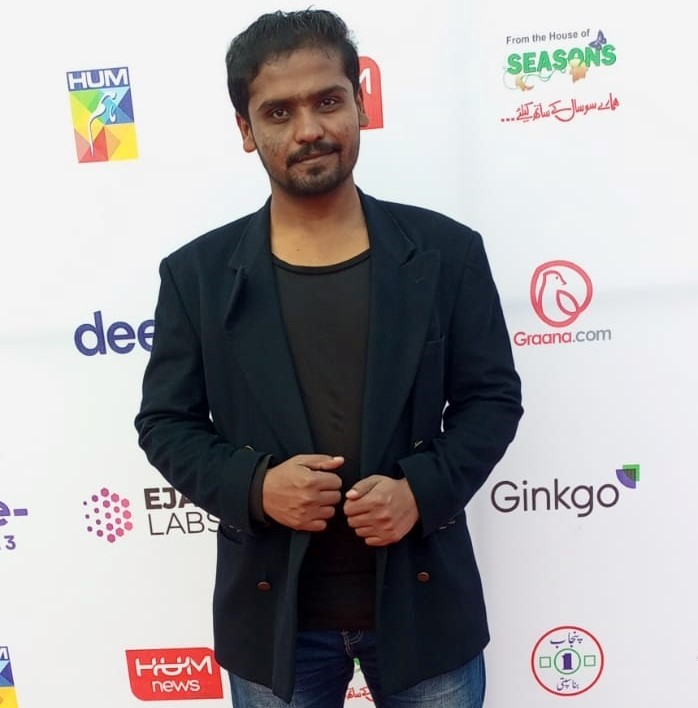

In [6]:
# load cv image and display
im_path = "3.jpg"
img = cv2.imread(im_path)
converted_pil_img = Image.fromarray(img)
display(converted_pil_img)

# convert into RGB channel
converted_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(Image.fromarray(converted_img))

### 2. Thresholding

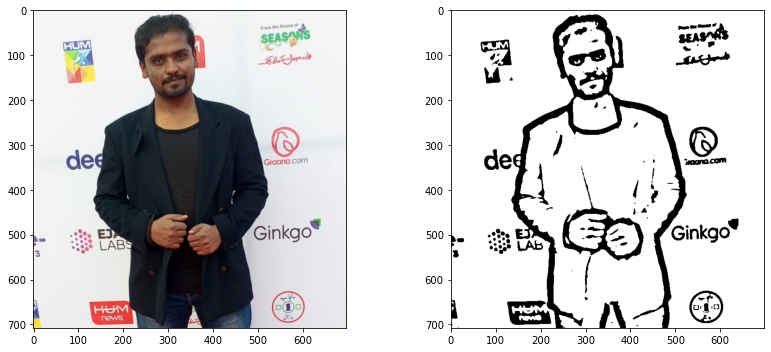

In [7]:
### Read and prepare image

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

# Apply adaptive thresholding
mask = cv2.adaptiveThreshold(blurred, 
                              255, 
                              cv2.ADAPTIVE_THRESH_MEAN_C, 
                              cv2.THRESH_BINARY, 
                              31, 
                              10)

# Plot results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.tight_layout()

### 3. Morphological Operations

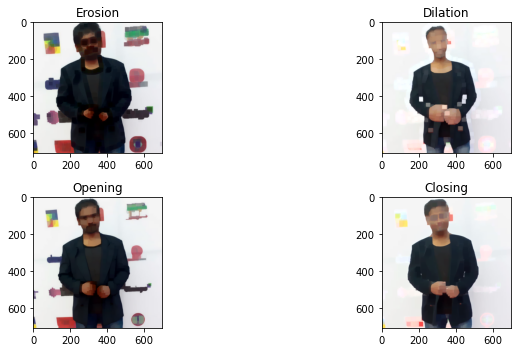

In [8]:
kernel = np.ones((20, 20), np.uint8)


erosion = cv2.erode(img, kernel, iterations=1)
dilation = cv2.dilate(img, kernel, iterations=1)

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

fig, ax = plt.subplots(2, 2, figsize=(12, 5))
ax[0][0].imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))
ax[0][0].title.set_text('Erosion')

ax[0][1].imshow(cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB))
ax[0][1].title.set_text('Dilation')

ax[1][0].imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
ax[1][0].title.set_text('Opening')

ax[1][1].imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))
ax[1][1].title.set_text('Closing')
plt.tight_layout()


### 4. Smooth Image

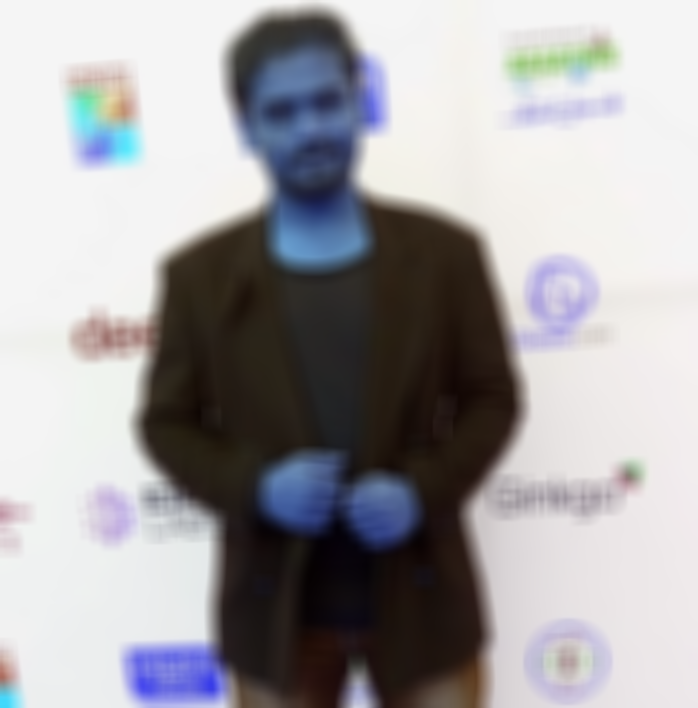

In [9]:
ksize = (20, 20)
blur_img = cv2.blur(img, ksize) 
display(Image.fromarray(blur_img))

### 5. Add text

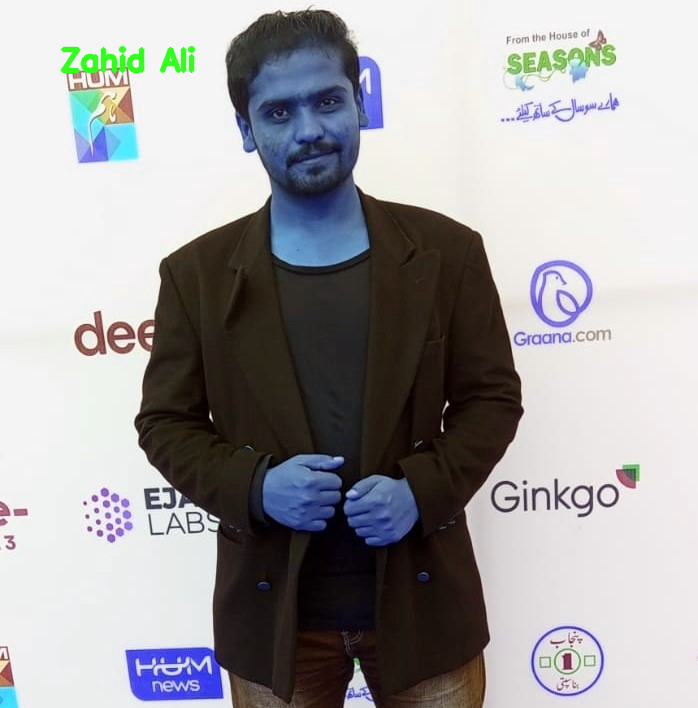

In [16]:
im_path = "3.jpg"
img = cv2.imread(im_path)
font = cv2.FONT_HERSHEY_SIMPLEX
org = (60, 70)
fontScale = 1
# Blue color in BGR
color = (50, 255, 30)
# Line thickness of 2 px
thickness = 4
   
# Using cv2.putText() method
text_img = cv2.putText(img, 'Zahid Ali', org, font, fontScale, color, thickness, cv2.LINE_AA)
display(Image.fromarray(text_img))

### 6. Save Image

In [17]:
cv2.imwrite('saved_img.png',text_img)

True

### 7. Add borders

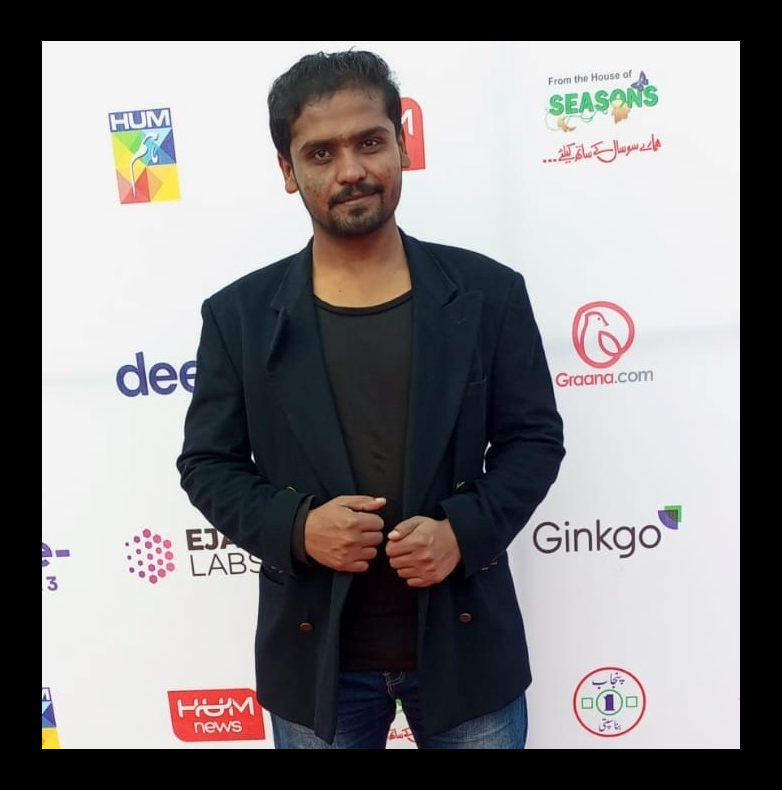

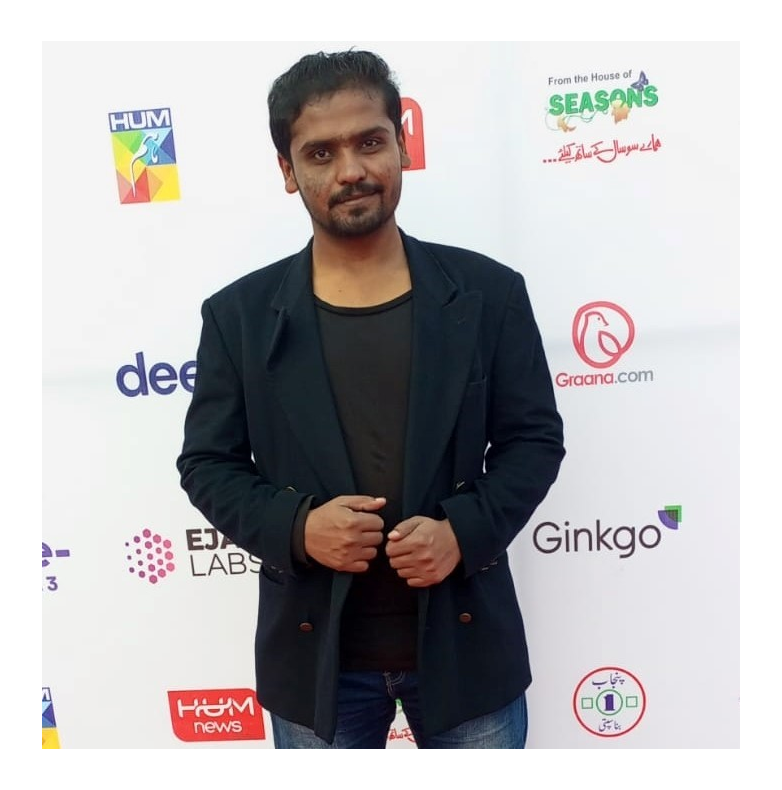

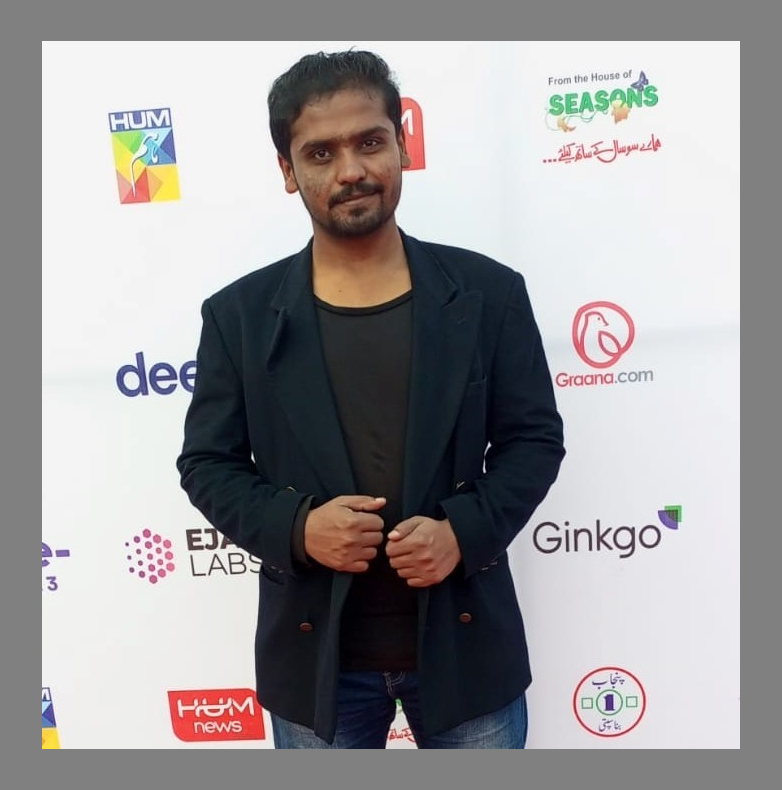

In [22]:
def image_border(img, per):
    height = int(img.shape[0] * (per/500))
    width = int(img.shape[1] * (per/500))
    
    #black border
    black = cv2.copyMakeBorder(src=img, top=width, bottom=width, left=height, right=height, borderType=cv2.BORDER_CONSTANT,
                                        value=[0, 0, 0]) 
    black = cv2.cvtColor(black, cv2.COLOR_BGR2RGB)
    
    
    #white border
    white = cv2.copyMakeBorder(src=img, top=width, bottom=width, left=height, right=height, borderType=cv2.BORDER_CONSTANT,
                                        value=[255, 255, 255]) 
    white = cv2.cvtColor(white, cv2.COLOR_BGR2RGB)
    
    #gray border
    gray = cv2.copyMakeBorder(src=img, top=width, bottom=width, left=height, right=height, borderType=cv2.BORDER_CONSTANT,
                                        value=[128, 128, 128]) 
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
    
    
    display(Image.fromarray(black))
    display(Image.fromarray(white))
    display(Image.fromarray(gray))
    
    
    
    
    
img_path = "3.jpg"
img = cv2.imread(img_path)
per = 30
image_border(img,per)

### 8. Resize Image

In [23]:
def resize_img(img):
    
    width = 1024
    ar = int(img.shape[1]/img.shape[0])
    dim = (width, ar)

    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized
    
img_path = "3.jpg"
img = cv2.imread(img_path)
display(Image.fromarray(resize_img(img)))

error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4065: error: (-215:Assertion failed) inv_scale_x > 0 in function 'resize'


### 9. Resize Image with multiplying factor

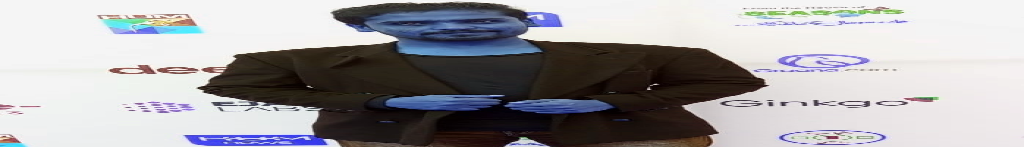

In [24]:
def resize_img(img, mf):
    
    width = 1024
    ar = int((img.shape[1]/img.shape[0])*mf)
    dim = (width, ar)

    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized
    
img_path = "3.jpg"
img = cv2.imread(img_path)
mf=150
display(Image.fromarray(resize_img(img,mf)))

### 10. Add noise

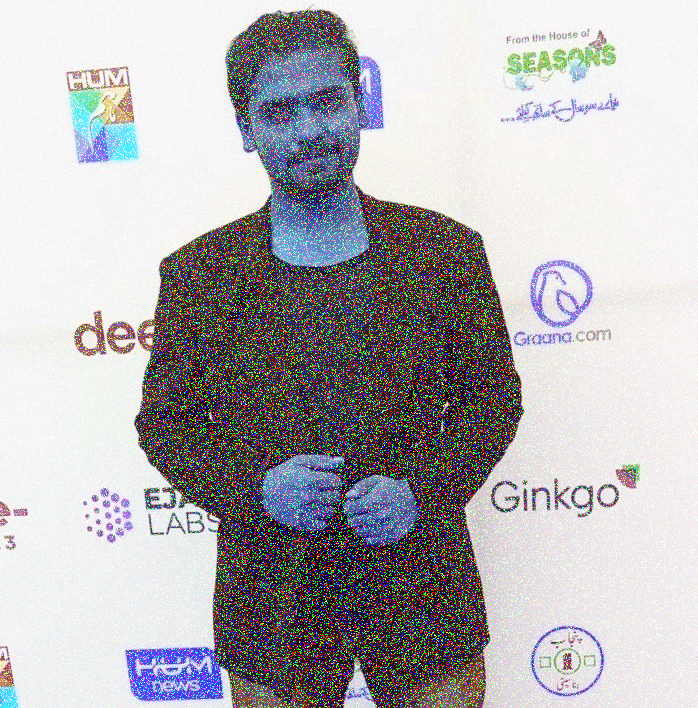

In [25]:
def add_noise(img):
    gauss = np.random.normal(0,1,img.size)
    gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
    img_gauss = cv2.add(img,gauss)
    display(Image.fromarray(img_gauss))
    
add_noise(img)

### 11. Blur Image

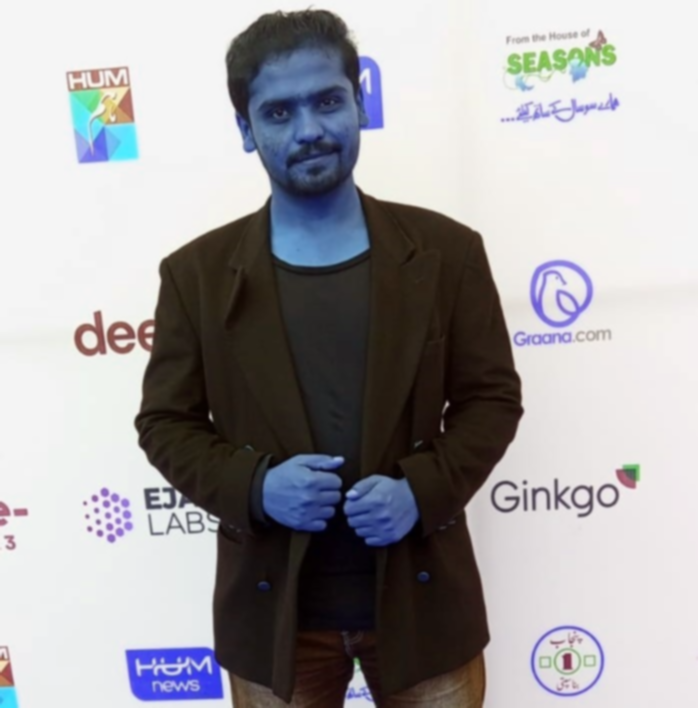

In [26]:
def blur_image(img):
    gausBlur = cv2.GaussianBlur(img, (5,5),0) 
    display(Image.fromarray(gausBlur))
blur_image(img)

### 12. Brightness of Image

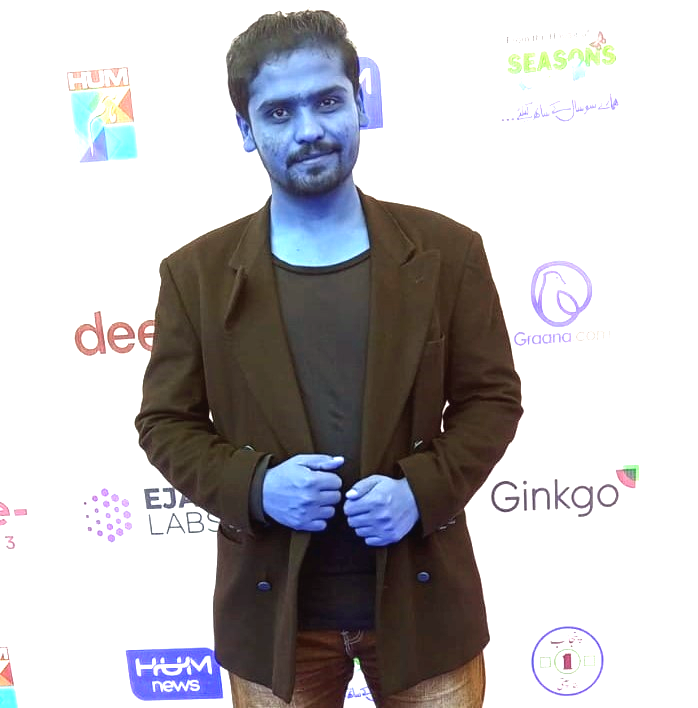

In [27]:
def bright_image(img):
    alpha = 1.5 # Contrast control
    beta = 10 # Brightness control
    bright = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    display(Image.fromarray(bright))
bright_image(img)
    

### 13. Histogram 

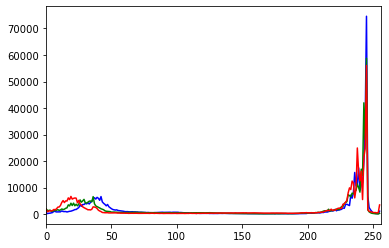

In [28]:
def histogram(img):
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
        
histogram(img)

### 14. Edge Detection

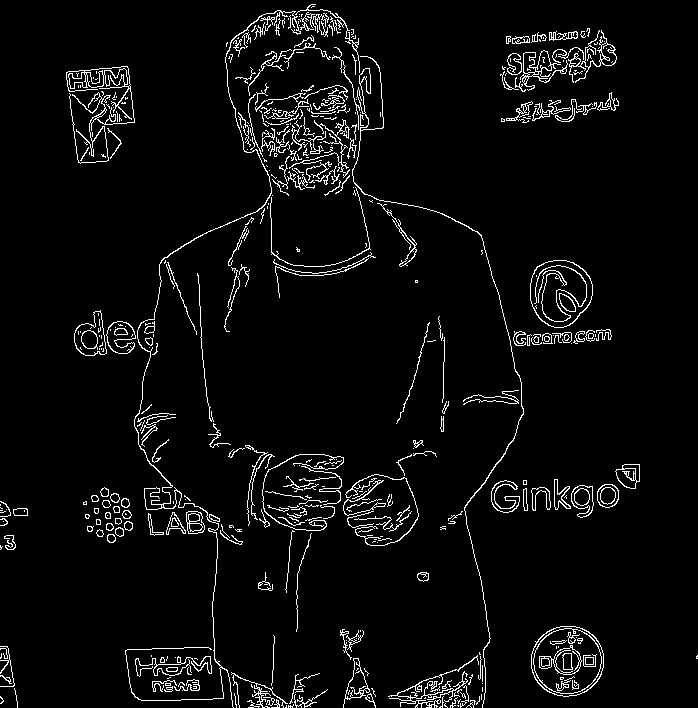

In [29]:
def edge_detection(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, threshold1=30, threshold2=100)
    display(Image.fromarray(edges))
edge_detection(img)

In [30]:
import cv2

# Load the input image in grayscale
img = cv2.imread('3.jpg', 0)

# Apply thresholding to segment the foreground text from the background
thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Perform morphological operations to remove noise and fill gaps in the text
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Apply a filter to smooth the image and further reduce noise
blur = cv2.medianBlur(morph, 3)

# Add text to the image using cv2.putText()
text = 'Enhanced Text'
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(blur, text, (50, 50), font, 1, (255, 255, 255), 2, cv2.LINE_AA)

# Save the output image
cv2.imwrite('output_image.jpg', blur)


True